In [74]:
import pandas as pd

In [75]:
import numpy as np

In [76]:
from sklearn.cluster import KMeans

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
import seaborn as sns

In [82]:
train=pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv")
test=pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv")

In [83]:
train.shape

(891, 12)

In [84]:
test.shape

(418, 11)

In [85]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [86]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [87]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [89]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [90]:
test.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [91]:
train.head().isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [92]:
train.isna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [93]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [94]:
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [95]:
train.drop(['Cabin'],axis=1,inplace=True)

In [96]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [97]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [98]:
test['Age'].fillna(test['Age'].mean(),inplace=True)

In [99]:
test.drop(['Cabin'],axis=1,inplace=True)

In [100]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by=['Survived'],ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [101]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by=['Survived'],ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [102]:
train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by=['SibSp'],ascending=False)

,SibSp,Survived
6,8,0.000000
5,5,0.000000
4,4,0.166667
3,3,0.250000
2,2,0.464286
1,1,0.535885
0,0,0.345395


In [103]:
train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by=['Parch'],ascending=False)

,Parch,Survived
6,6,0.000000
5,5,0.200000
4,4,0.000000
3,3,0.600000
2,2,0.500000
1,1,0.550847
0,0,0.343658


In [104]:
train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by=['Embarked'],ascending=False)

,Embarked,Survived
2,S,0.336957
1,Q,0.389610
0,C,0.553571


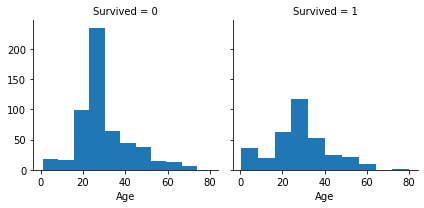

In [105]:
g=sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age',bins=10)

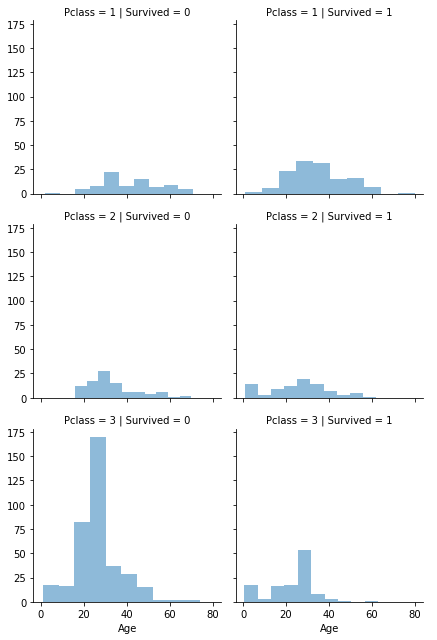

In [106]:
grid=sns.FacetGrid(train, row='Pclass',col='Survived')
grid.map(plt.hist,'Age',alpha=0.5,bins=10)
grid.add_legend()

In [107]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [108]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [111]:
train=train.drop(['Name','Ticket','Fare','Embarked'],axis=1)
test=test.drop(['Name','Ticket','Fare','Embarked'],axis=1)

In [112]:
le=LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'])
test['Sex']=le.fit_transform(test['Sex'])

In [113]:
X=np.array(train.drop(['Survived'],axis=1)).astype(float)
y=np.array(train['Survived'])

In [144]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.000000,1,0
1,2,1,1,0,38.000000,1,0
2,3,1,3,0,26.000000,0,0
3,4,1,1,0,35.000000,1,0
4,5,0,3,1,35.000000,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0
887,888,1,1,0,19.000000,0,0
888,889,0,3,0,29.699118,1,2
889,890,1,1,1,26.000000,0,0


In [136]:
scaler=MinMaxScaler()

In [137]:
X=scaler.fit_transform(X)

In [138]:
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(max_iter=600, n_clusters=2)

In [139]:
correct=0

for i in range(len(X)):
    p=np.array(X[i].astype(float))
    p=p.reshape(-1,len(p))
    r=kmeans.predict(p)
    if(r==y[i]):
        correct+=1

print(correct/len(X))

0.2132435465768799


In [140]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [141]:
kmeans1=KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')

In [142]:
kmeans1.fit(X_scaled)

KMeans(max_iter=600, n_clusters=2)

In [157]:
p1=kmeans1.predict(X)

In [143]:
correct=0

for i in range(len(X)):
    p=np.array(X[i].astype(float))
    p=p.reshape(-1,len(p))
    r=kmeans1.predict(p)
    if(r==y[i]):
        correct+=1

print(correct/len(X))

0.7867564534231201


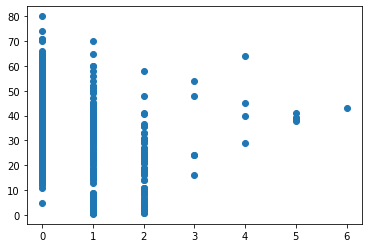

In [155]:
plt.scatter(train['Parch'],train['Age'])

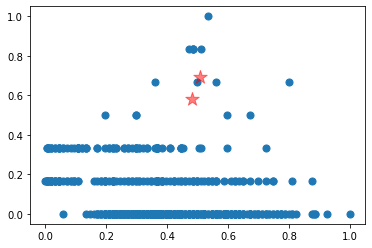

In [166]:
plt.scatter(X[:,3],X[:,5],s=50, cmap='viridis')
c=kmeans.cluster_centers_
plt.scatter(c[:,0],c[:,1],c='r',marker='*',s=200,alpha=0.5)